# Titanic survived Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis (EDA)

In [4]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns, out of which 1 is a target variable and the remaining 11 are independent variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
Age_missing_data = df['Age'].isnull().sum()/len(df)*100
print('Age_missing_data', round(Age_missing_data,2), '%')

Age_missing_data 19.87 %


In [10]:
Cabin_missing_data = df['Cabin'].isnull().sum()/len(df)*100
print('Cabin_missing_data', round(Cabin_missing_data,2), '%')

Cabin_missing_data 77.1 %


Around 20% of "Age" data is missing, so we can impute the mean in the "Age" column and the most occurring value in the "Embarked" column. In addition, since the "Cabin" data has 77% of missing values, we can drop this column from the dataset.

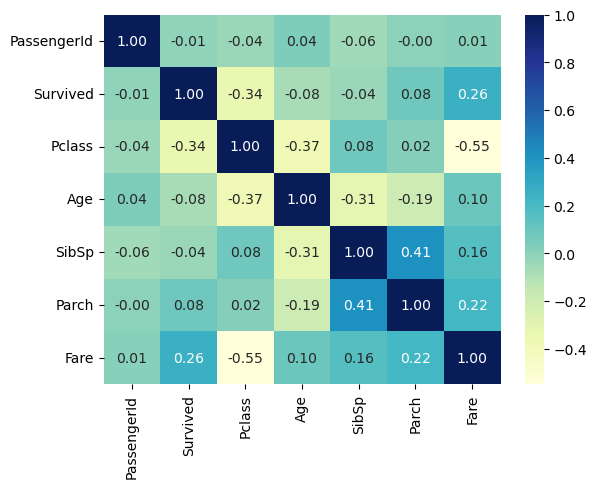

In [11]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f',cmap='YlGnBu')
plt.show()

In [12]:
df=df.drop(columns='Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we do not have any missing values in our dataset.

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization

In [18]:
sns.set()

0    549
1    342
Name: Survived, dtype: int64


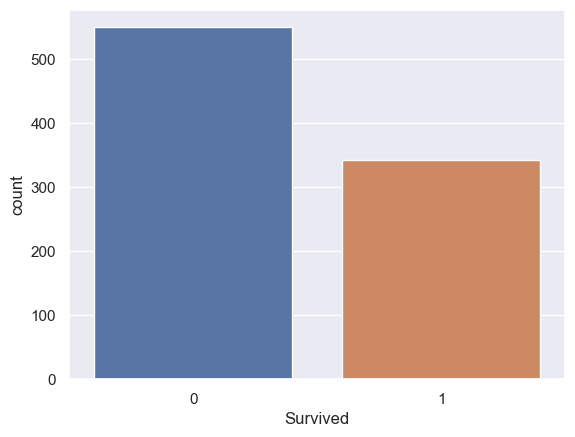

In [19]:
sns.countplot(x='Survived', data=df)
print(df['Survived'].value_counts())

In [20]:
survived_percent = round(df['Survived'].value_counts()[1]/len(df)*100)
print("Out of 891 people {}% people survived in the accident". format(survived_percent))

Out of 891 people 38% people survived in the accident


male      577
female    314
Name: Sex, dtype: int64


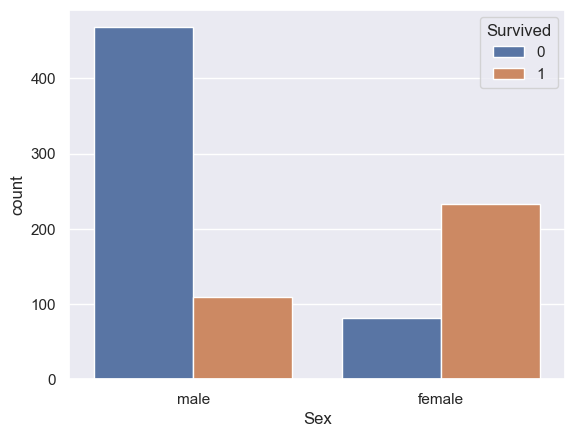

In [21]:
sns.countplot(x='Sex', hue="Survived", data=df)
print(df['Sex'].value_counts())

In [22]:
sex_percentage = round(df['Sex'].value_counts()/891*100)
sex_percentage

male      65.0
female    35.0
Name: Sex, dtype: float64

In [23]:
pd.crosstab(df['Sex'],df['Survived']).apply(lambda x: round((x/x.sum()*100),1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


The survival rate of females was much greater than the survival rate of males.

3    491
1    216
2    184
Name: Pclass, dtype: int64


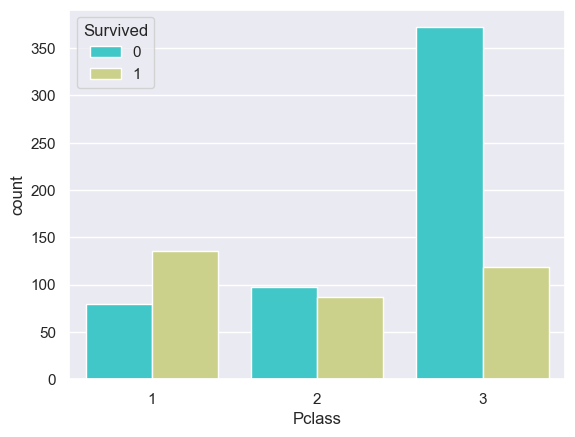

In [24]:
sns.countplot(x='Pclass', hue="Survived", data=df, palette="rainbow")
print(df['Pclass'].value_counts())

In [25]:
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda x : round((x/x.sum()*100),1), axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


S    646
C    168
Q     77
Name: Embarked, dtype: int64


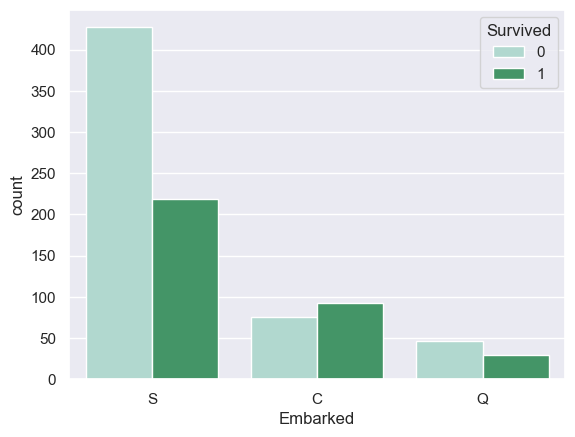

In [26]:
sns.countplot(x='Embarked', hue="Survived", data=df, palette="BuGn")
print(df['Embarked'].value_counts())

In [27]:
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda x : round((x/x.sum()*100),1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


For S Embarkment, people who survived were less as compared to the people who didn't survive, and the same pattern can be seen for Q Embarkment. On the other hand, embarkation C has a different pattern.

In [28]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

Using the "astype" method, the type of the above-mentioned columns has been changed to the correct one.

In [29]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

0.45956263424701577

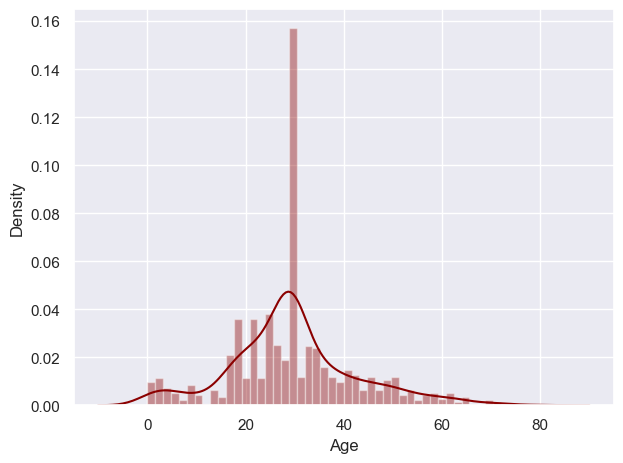

In [30]:
sns.distplot(df['Age'],color='darkred', bins=50)
plt.tight_layout()
df['Age'].skew()

<Axes: xlabel='Age'>

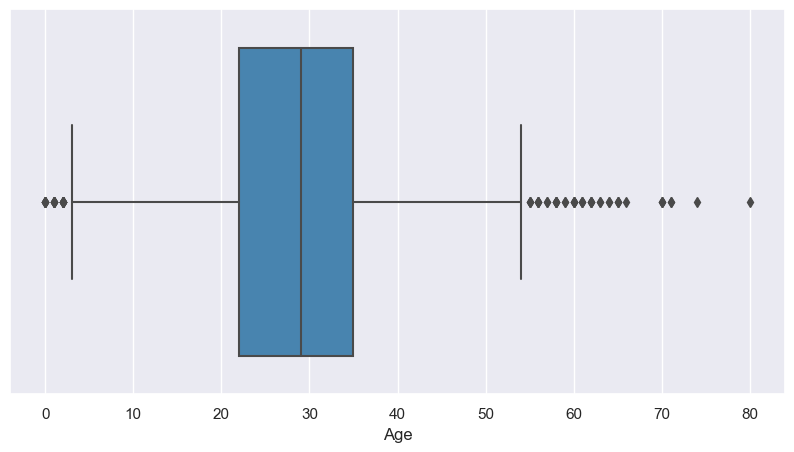

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',data=df,palette='Blues_d')

4.787316519674893

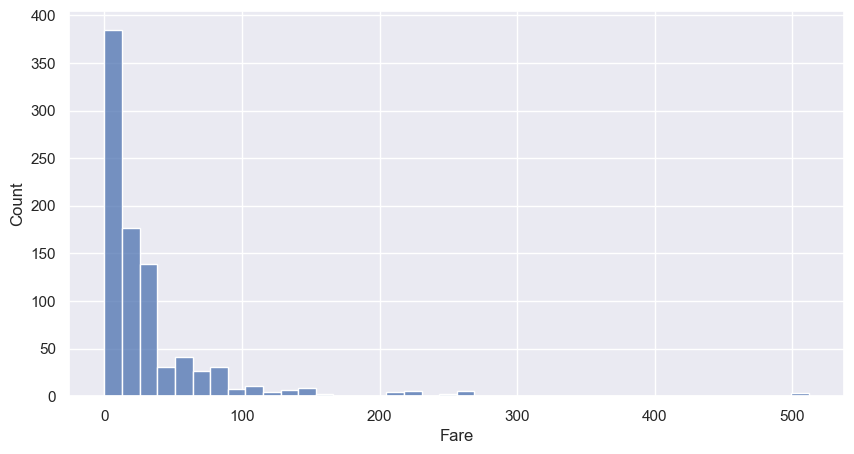

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], bins=40)
df['Fare'].skew()

<Axes: xlabel='Fare'>

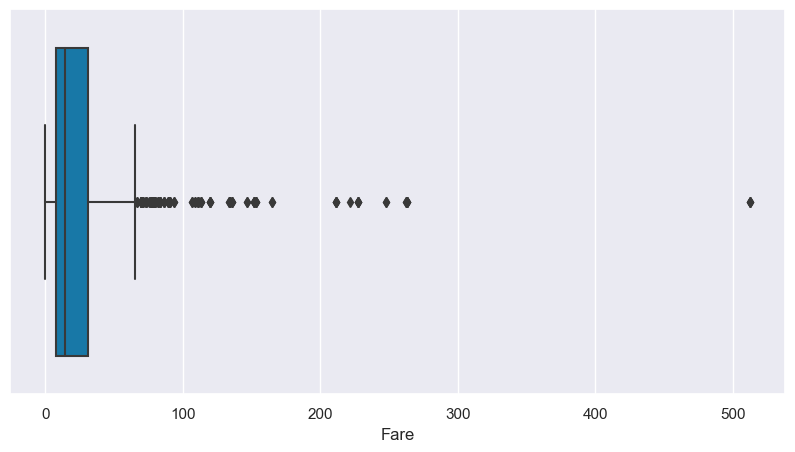

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Fare',data=df,palette='winter')

We can see that the "Fare" and "Age" columns have some outliers that have to be removed before splitting the dataset.

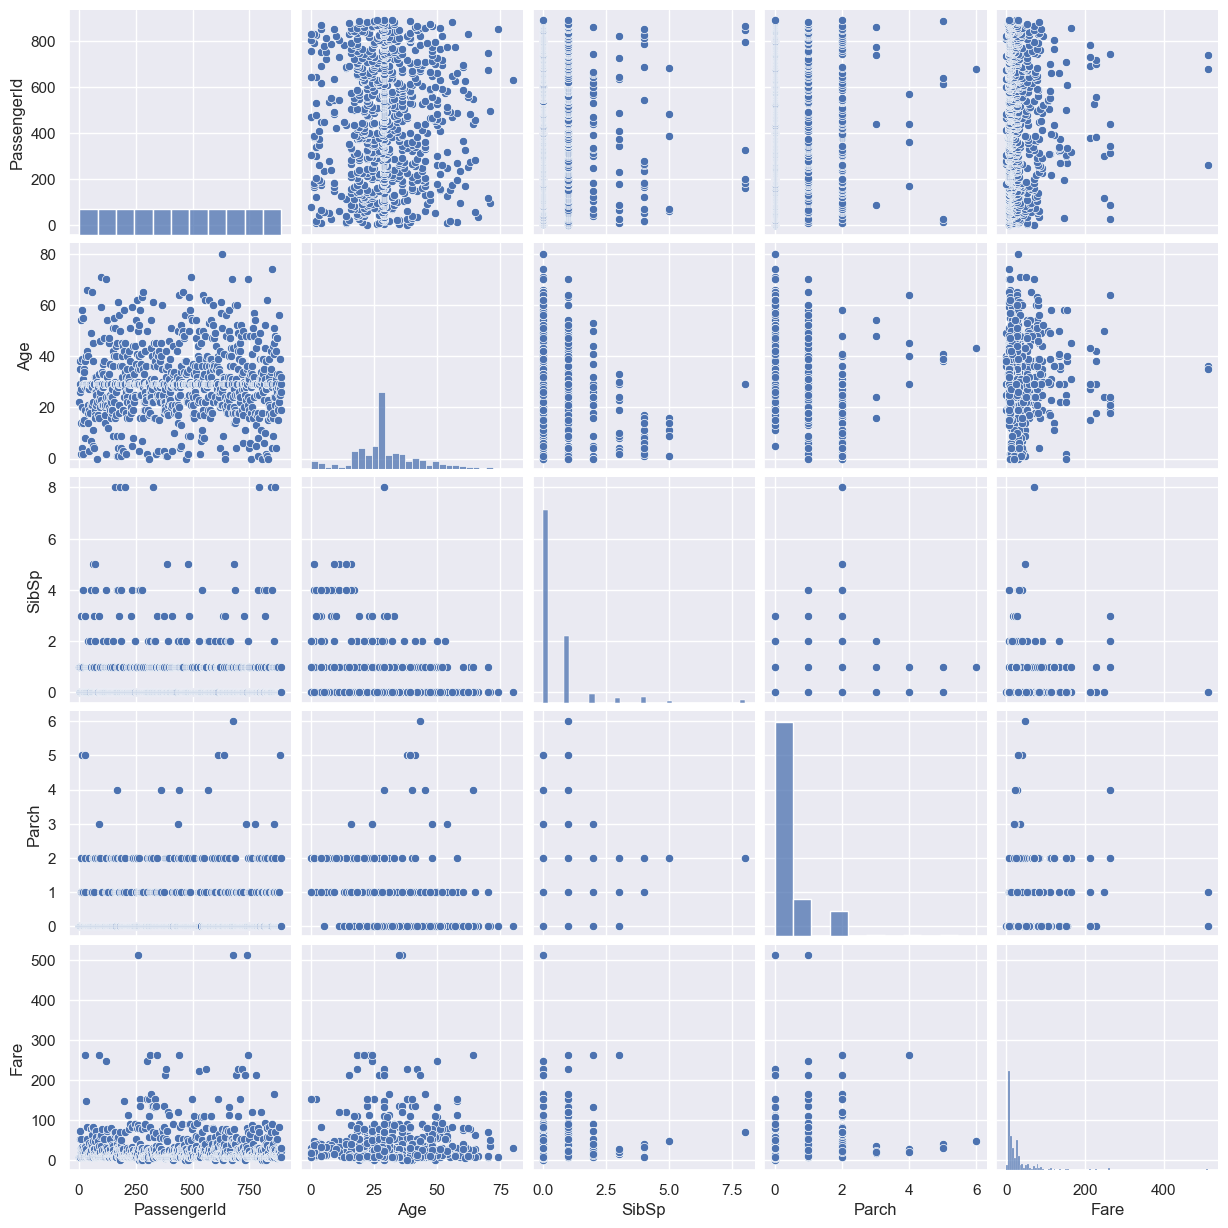

In [34]:
sns.pairplot(df)

Encoding the Categorical columns

In [35]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,1


In [37]:
df.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033741,-0.057527,-0.001652,0.012658
Age,0.033741,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.093856,0.159651,0.216225,1.000000


<Axes: >

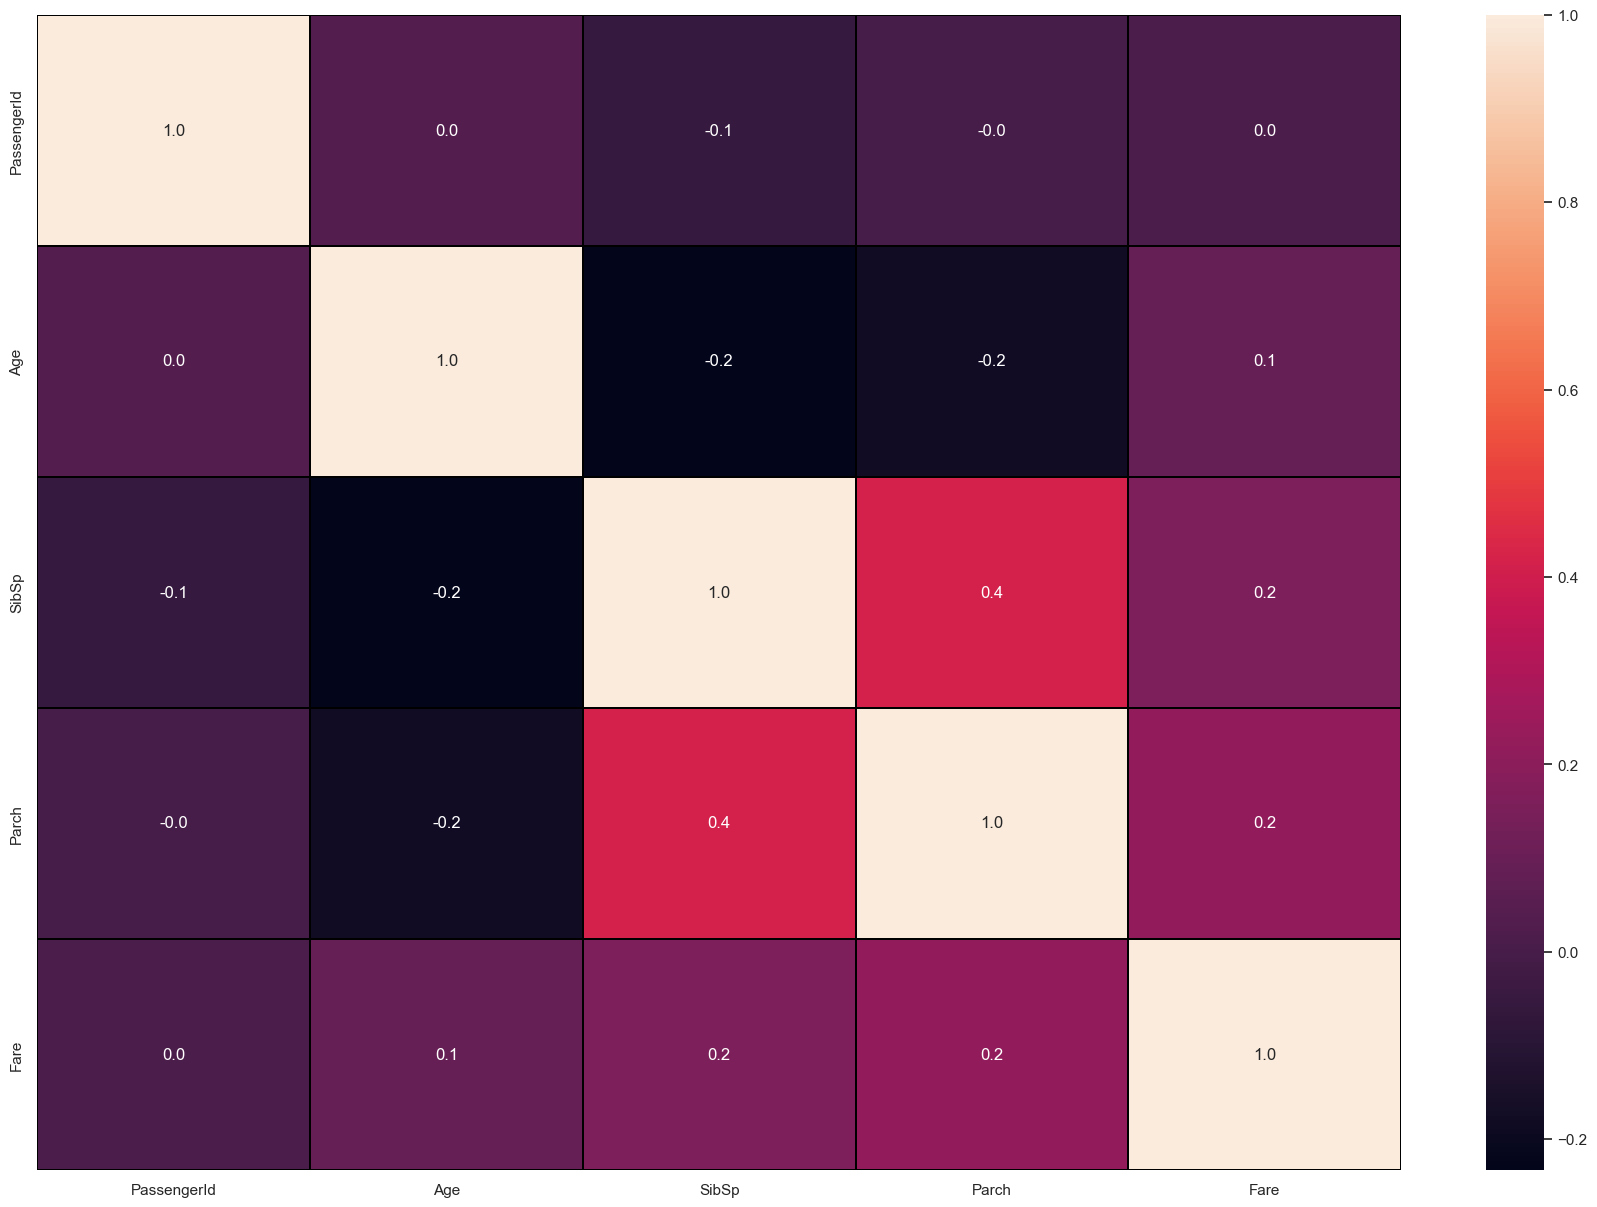

In [38]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, fmt='0.1f', linewidth='0.2', linecolor='black', annot_kws={'size':12})

Removing the outliers from 'Age' and 'Fare' columns

In [39]:
df=df[df['Age']<df['Age'].mean()+3*df['Age'].std()]

In [40]:
df.shape

(884, 11)

In [41]:
Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

outlier_low = Q1 - 1.5*(Q3-Q1)
outlier_high = Q3 + 1.5*(Q3-Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [42]:
df.shape

(769, 11)

Seperating Features and Target

In [43]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y =df['Survived']

In [44]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
5,3,0,29,0,0,8.4583,2
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,29,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.705178,-0.681734,-0.540039,0.619971,-0.435727,-0.777547,-0.527551
1,0.705178,1.466847,-0.212717,-0.488768,-0.435727,-0.727699,-0.527551
2,-2.033619,1.466847,0.523758,0.619971,-0.435727,2.608437,-0.527551
3,0.705178,-0.681734,0.523758,-0.488768,-0.435727,-0.718468,-0.527551
4,0.705178,-0.681734,0.032775,-0.488768,-0.435727,-0.688315,2.569293
...,...,...,...,...,...,...,...
764,-0.664221,-0.681734,-0.130886,-0.488768,-0.435727,-0.352914,-0.527551
765,-2.033619,1.466847,-0.785531,-0.488768,-0.435727,0.902522,-0.527551
766,0.705178,1.466847,0.032775,0.619971,2.102711,0.418810,-0.527551
767,-2.033619,-0.681734,-0.212717,-0.488768,-0.435727,0.902522,1.020871


In [46]:
Y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 769, dtype: category
Categories (2, int64): [0, 1]

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score

In [49]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train, Y_train)
    pred = LR.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Best accuracy is: ",MaxAccu, "at random state", MaxRS)

Best accuracy is:  0.8441558441558441 at random state 18


Creating Train Test Split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=MaxRS)

Modelling

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [52]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [53]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
predRFC= RFC.predict(X_test)
print(accuracy_score(Y_test,predRFC))
print(confusion_matrix(Y_test,predRFC))
print(classification_report(Y_test,predRFC))

0.8138528138528138
[[137  14]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       151
           1       0.78      0.64      0.70        80

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231



Support Vector Machine Classifier

In [54]:
SVC = SVC()
SVC.fit(X_train, Y_train)
predSVC= SVC.predict(X_test)
print(accuracy_score(Y_test,predSVC))
print(confusion_matrix(Y_test,predSVC))
print(classification_report(Y_test,predSVC))

0.8354978354978355
[[144   7]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       151
           1       0.88      0.61      0.72        80

    accuracy                           0.84       231
   macro avg       0.85      0.78      0.80       231
weighted avg       0.84      0.84      0.83       231



Gradient Boosting Classifier

In [55]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
predGBC= GBC.predict(X_test)
print(accuracy_score(Y_test,predGBC))
print(confusion_matrix(Y_test,predGBC))
print(classification_report(Y_test,predGBC))

0.8268398268398268
[[139  12]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       151
           1       0.81      0.65      0.72        80

    accuracy                           0.83       231
   macro avg       0.82      0.79      0.80       231
weighted avg       0.83      0.83      0.82       231



AdaBoost Classifier

In [56]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, Y_train)
predABC= ABC.predict(X_test)
print(accuracy_score(Y_test,predABC))
print(confusion_matrix(Y_test,predABC))
print(classification_report(Y_test,predABC))

0.8095238095238095
[[137  14]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       151
           1       0.78      0.62      0.69        80

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



Bagging Classifier

In [57]:
BGC = BaggingClassifier()
BGC.fit(X_train, Y_train)
predBGC= BGC.predict(X_test)
print(accuracy_score(Y_test,predBGC))
print(confusion_matrix(Y_test,predBGC))
print(classification_report(Y_test,predBGC))

0.8354978354978355
[[140  11]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       151
           1       0.83      0.66      0.74        80

    accuracy                           0.84       231
   macro avg       0.83      0.79      0.81       231
weighted avg       0.83      0.84      0.83       231



Extra Trees Classifier

In [58]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, Y_train)
predETC= ETC.predict(X_test)
print(accuracy_score(Y_test,predETC))
print(confusion_matrix(Y_test,predETC))
print(classification_report(Y_test,predETC))

0.7965367965367965
[[133  18]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       151
           1       0.74      0.64      0.68        80

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



Logistic Regression

In [59]:
LGR = LogisticRegression()
LGR.fit(X_train, Y_train)
predLGR= LGR.predict(X_test)
print(accuracy_score(Y_test,predLGR))
print(confusion_matrix(Y_test,predLGR))
print(classification_report(Y_test,predLGR))

0.8441558441558441
[[138  13]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       151
           1       0.81      0.71      0.76        80

    accuracy                           0.84       231
   macro avg       0.84      0.81      0.82       231
weighted avg       0.84      0.84      0.84       231



In [60]:
Y.value_counts()

0    507
1    262
Name: Survived, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,Y)

In [62]:
Y.value_counts()

0    507
1    262
Name: Survived, dtype: int64

Cross Validation Score

In [63]:
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predRFC) - score.mean())

[0.76847291 0.81773399 0.85714286 0.86206897 0.85643564]
0.8323708725552359
Difference between accuracy score and cross validation score is: -0.01851805870242207


In [64]:
score = cross_val_score(SVC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predSVC) - score.mean())

[0.76847291 0.79802956 0.85221675 0.84236453 0.82673267]
0.8175632834219384
Difference between accuracy score and cross validation score is: 0.017934552075897114


In [65]:
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predGBC) - score.mean())

[0.77339901 0.80295567 0.85221675 0.85714286 0.80693069]
0.8185289957567186
Difference between accuracy score and cross validation score is: 0.008310831083108261


In [66]:
score = cross_val_score(ABC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predABC) - score.mean())

[0.7635468  0.77339901 0.82758621 0.83743842 0.75247525]
0.7908891381749011
Difference between accuracy score and cross validation score is: 0.018634671348908394


In [67]:
score = cross_val_score(BGC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predBGC) - score.mean())

[0.72413793 0.79802956 0.85221675 0.85714286 0.83168317]
0.8126420523825783
Difference between accuracy score and cross validation score is: 0.022855783115257267


In [68]:
score = cross_val_score(ETC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predETC) - score.mean())

[0.77339901 0.80788177 0.87192118 0.8817734  0.84653465]
0.836302004584695
Difference between accuracy score and cross validation score is: -0.039765208047898404


In [69]:
score = cross_val_score(LGR, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(Y_test,predLGR) - score.mean())

[0.74384236 0.76847291 0.80788177 0.78325123 0.75742574]
0.7721748036872652
Difference between accuracy score and cross validation score is: 0.0719810404685789


In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predLGR)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8132036423841059

Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV
parameters= {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],'penalty':['l1','l2','elasticnet','none'],'C':[0.001,1,100]}

In [72]:
GCV=GridSearchCV(LogisticRegression(), parameters, cv=5)

In [73]:
GCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 1, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [74]:
GCV.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [75]:
Final_model = LogisticRegression(C= 1, penalty= 'l2', solver= 'newton-cg')

In [76]:
Final_model.fit(X_train, Y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(Y_test, predGBC)
print(acc*100)

82.68398268398268


In [77]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predGBC)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)

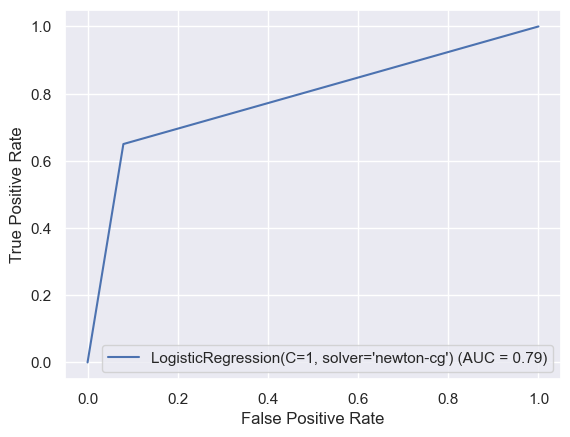

In [78]:
display.plot()

In [79]:
import joblib
joblib.dump(Final_model, "Titanic-prediction")

['Titanic-prediction']

Predicting the saved model

In [80]:
model=joblib.load("Titanic-prediction")

In [81]:
prediction=model.predict(X_test)
prediction

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [82]:
a=np.array(Y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
226,0,1
227,0,0
228,0,0
229,0,0


# World Happiness Project Report

In [83]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [84]:
df.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
110,Ukraine,Central and Eastern Europe,111,4.681,0.04412,0.79907,1.20278,0.67390,0.25123,0.02961,0.15275,1.57140
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
58,Belarus,Central and Eastern Europe,59,5.813,0.03938,1.03192,1.23289,0.73608,0.37938,0.19090,0.11046,2.13090
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009


In [85]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Exploratory Data Analysis (EDA)

In [86]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [88]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null values are present in the dataset.

In [89]:
df.columns.to_list()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [90]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [91]:
df.shape

(158, 12)

In [92]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


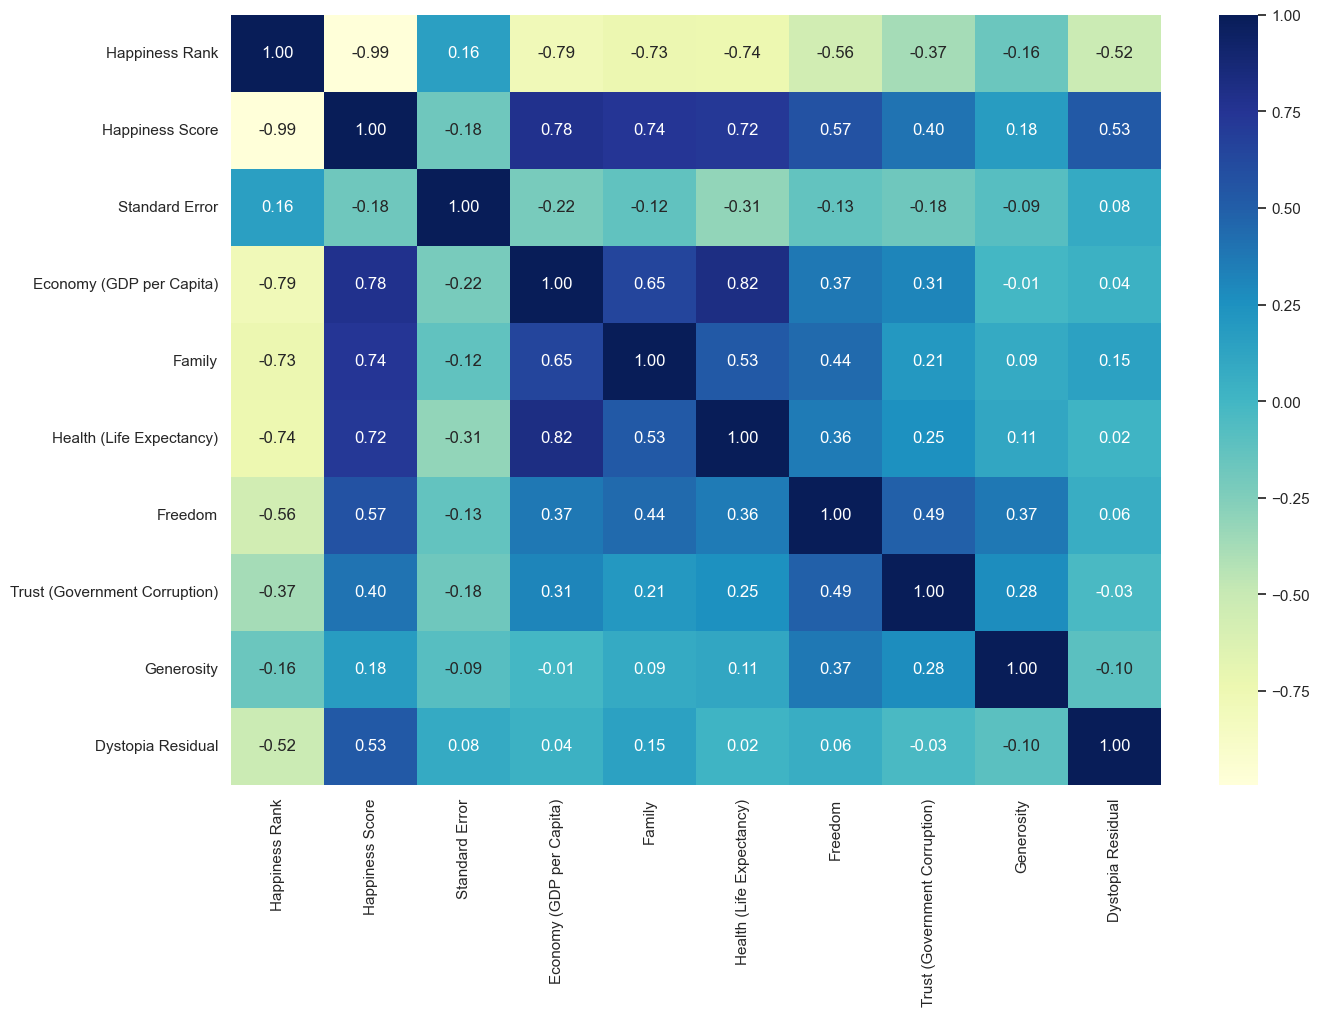

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f',cmap='YlGnBu')
plt.show()

In [94]:
GDP_happiness = ['Happiness Score','Economy (GDP per Capita)']
GDP_happiness_data = df[GDP_happiness]
GDP_happiness_data.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.000000,0.780966
Economy (GDP per Capita),0.780966,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Economy')

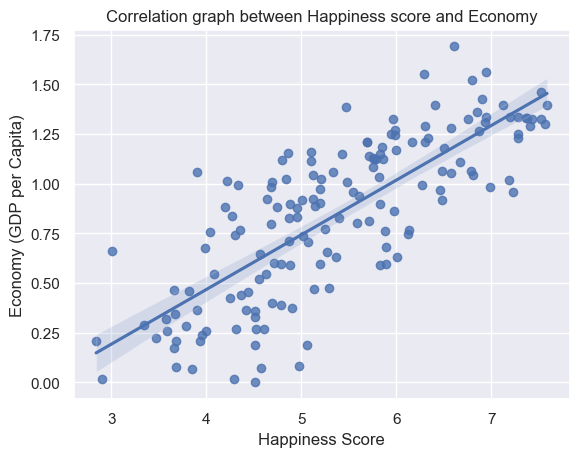

In [95]:
sns.regplot(data = GDP_happiness_data, x = 'Happiness Score', y = 'Economy (GDP per Capita)').set_title("Correlation graph between Happiness score and Economy")

In [96]:
Rank_happiness = ['Happiness Score','Happiness Rank']
Rank_happiness_data = df[Rank_happiness]
Rank_happiness_data.corr()

,Happiness Score,Happiness Rank
Happiness Score,1.000000,-0.992105
Happiness Rank,-0.992105,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Happiness rank')

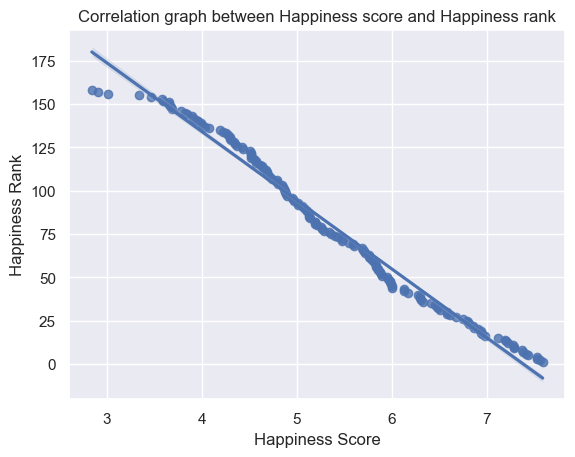

In [97]:
sns.regplot(data = Rank_happiness_data, x = 'Happiness Score', y = 'Happiness Rank').set_title("Correlation graph between Happiness score and Happiness rank")

In [98]:
Standard_error_happiness = ['Happiness Score','Standard Error']
Standard_error_happiness_data = df[Standard_error_happiness]
Standard_error_happiness_data.corr()

,Happiness Score,Standard Error
Happiness Score,1.000000,-0.177254
Standard Error,-0.177254,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Standard Error')

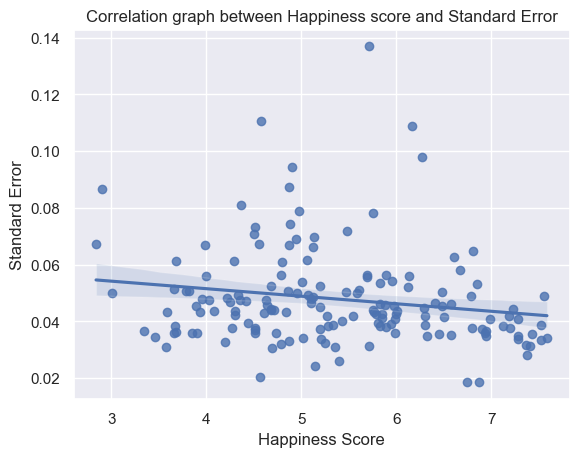

In [99]:
sns.regplot(data = Standard_error_happiness_data, x = 'Happiness Score', y = 'Standard Error').set_title("Correlation graph between Happiness score and Standard Error")

In [100]:
Family_happiness = ['Happiness Score','Family']
Family_happiness_data = df[Family_happiness]
Family_happiness_data.corr()

,Happiness Score,Family
Happiness Score,1.000000,0.740605
Family,0.740605,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Family')

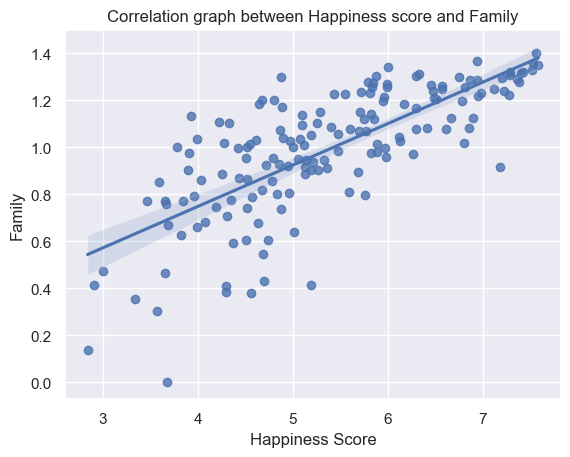

In [101]:
sns.regplot(data = Family_happiness_data, x = 'Happiness Score', y = 'Family').set_title("Correlation graph between Happiness score and Family")

In [102]:
Health_happiness = ['Happiness Score','Health (Life Expectancy)']
Health_happiness_data = df[Health_happiness]
Health_happiness_data.corr()

,Happiness Score,Health (Life Expectancy)
Happiness Score,1.0000,0.7242
Health (Life Expectancy),0.7242,1.0000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Health (Life Expectancy)')

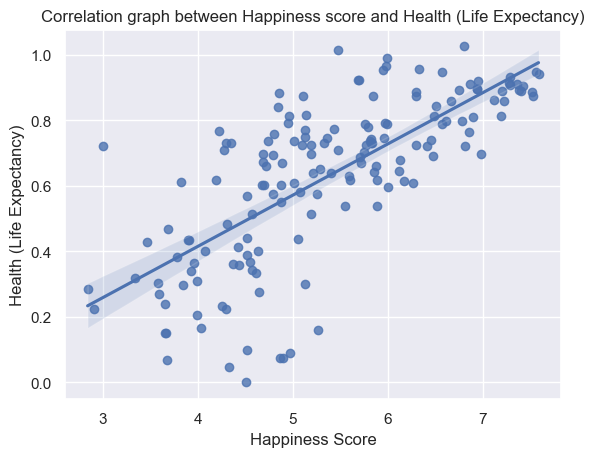

In [103]:
sns.regplot(data = Health_happiness_data, x = 'Happiness Score', y = 'Health (Life Expectancy)').set_title("Correlation graph between Happiness score and Health (Life Expectancy)")

In [104]:
Freedom_happiness = ['Happiness Score','Freedom']
Freedom_happiness_data = df[Freedom_happiness]
Freedom_happiness_data.corr()

,Happiness Score,Freedom
Happiness Score,1.000000,0.568211
Freedom,0.568211,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Freedom')

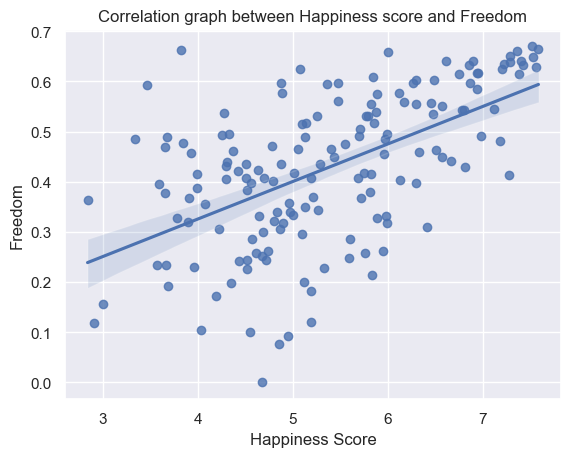

In [105]:
sns.regplot(data = Freedom_happiness_data, x = 'Happiness Score', y = 'Freedom').set_title("Correlation graph between Happiness score and Freedom")

In [106]:
Trust_happiness = ['Happiness Score','Trust (Government Corruption)']
Trust_happiness_data = df[Trust_happiness]
Trust_happiness_data.corr()

,Happiness Score,Trust (Government Corruption)
Happiness Score,1.000000,0.395199
Trust (Government Corruption),0.395199,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Trust (Government Corruption)')

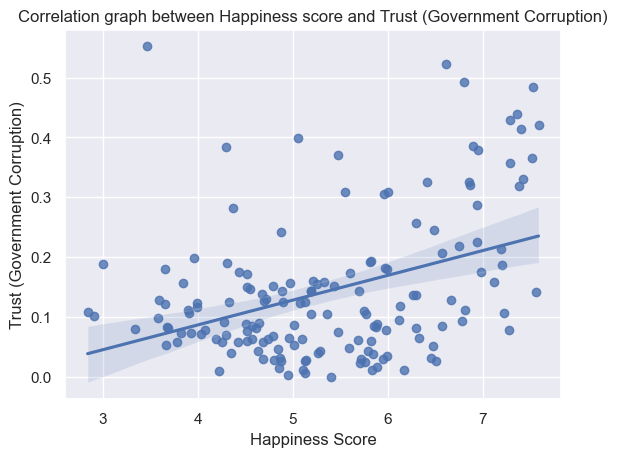

In [107]:
sns.regplot(data = Trust_happiness_data, x = 'Happiness Score', y = 'Trust (Government Corruption)').set_title("Correlation graph between Happiness score and Trust (Government Corruption)")

In [108]:
Generosity_happiness = ['Happiness Score','Generosity']
Generosity_happiness_data = df[Generosity_happiness]
Generosity_happiness_data.corr()

,Happiness Score,Generosity
Happiness Score,1.000000,0.180319
Generosity,0.180319,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Generosity')

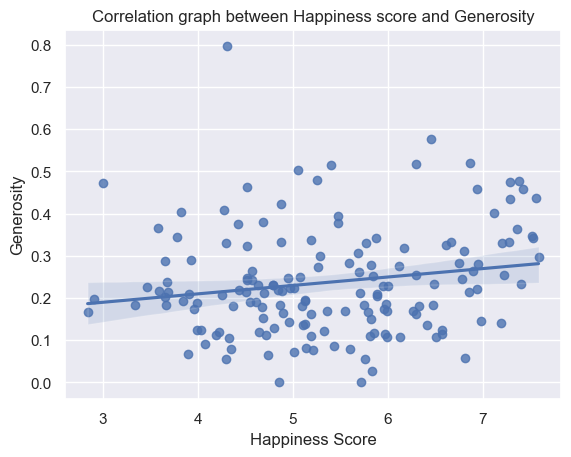

In [109]:
sns.regplot(data = Generosity_happiness_data, x = 'Happiness Score', y = 'Generosity').set_title("Correlation graph between Happiness score and Generosity")

In [110]:
Dystopia_Residual_happiness = ['Happiness Score','Dystopia Residual']
Dystopia_Residual_happiness_data = df[Dystopia_Residual_happiness]
Dystopia_Residual_happiness_data.corr()

,Happiness Score,Dystopia Residual
Happiness Score,1.000000,0.530474
Dystopia Residual,0.530474,1.000000


Text(0.5, 1.0, 'Correlation graph between Happiness score and Dystopia Residual')

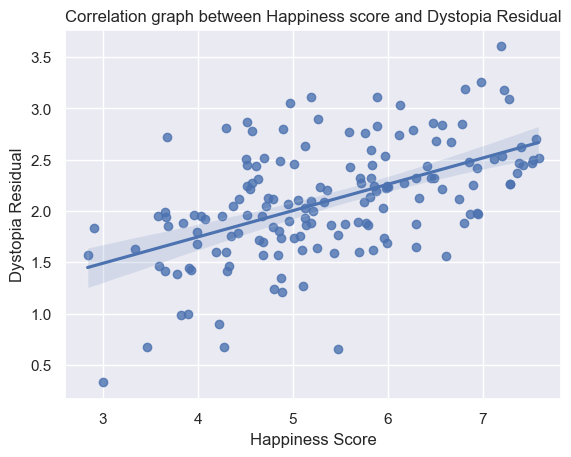

In [111]:
sns.regplot(data = Dystopia_Residual_happiness_data, x = 'Happiness Score', y = 'Dystopia Residual').set_title("Correlation graph between Happiness score and Dystopia Residual")

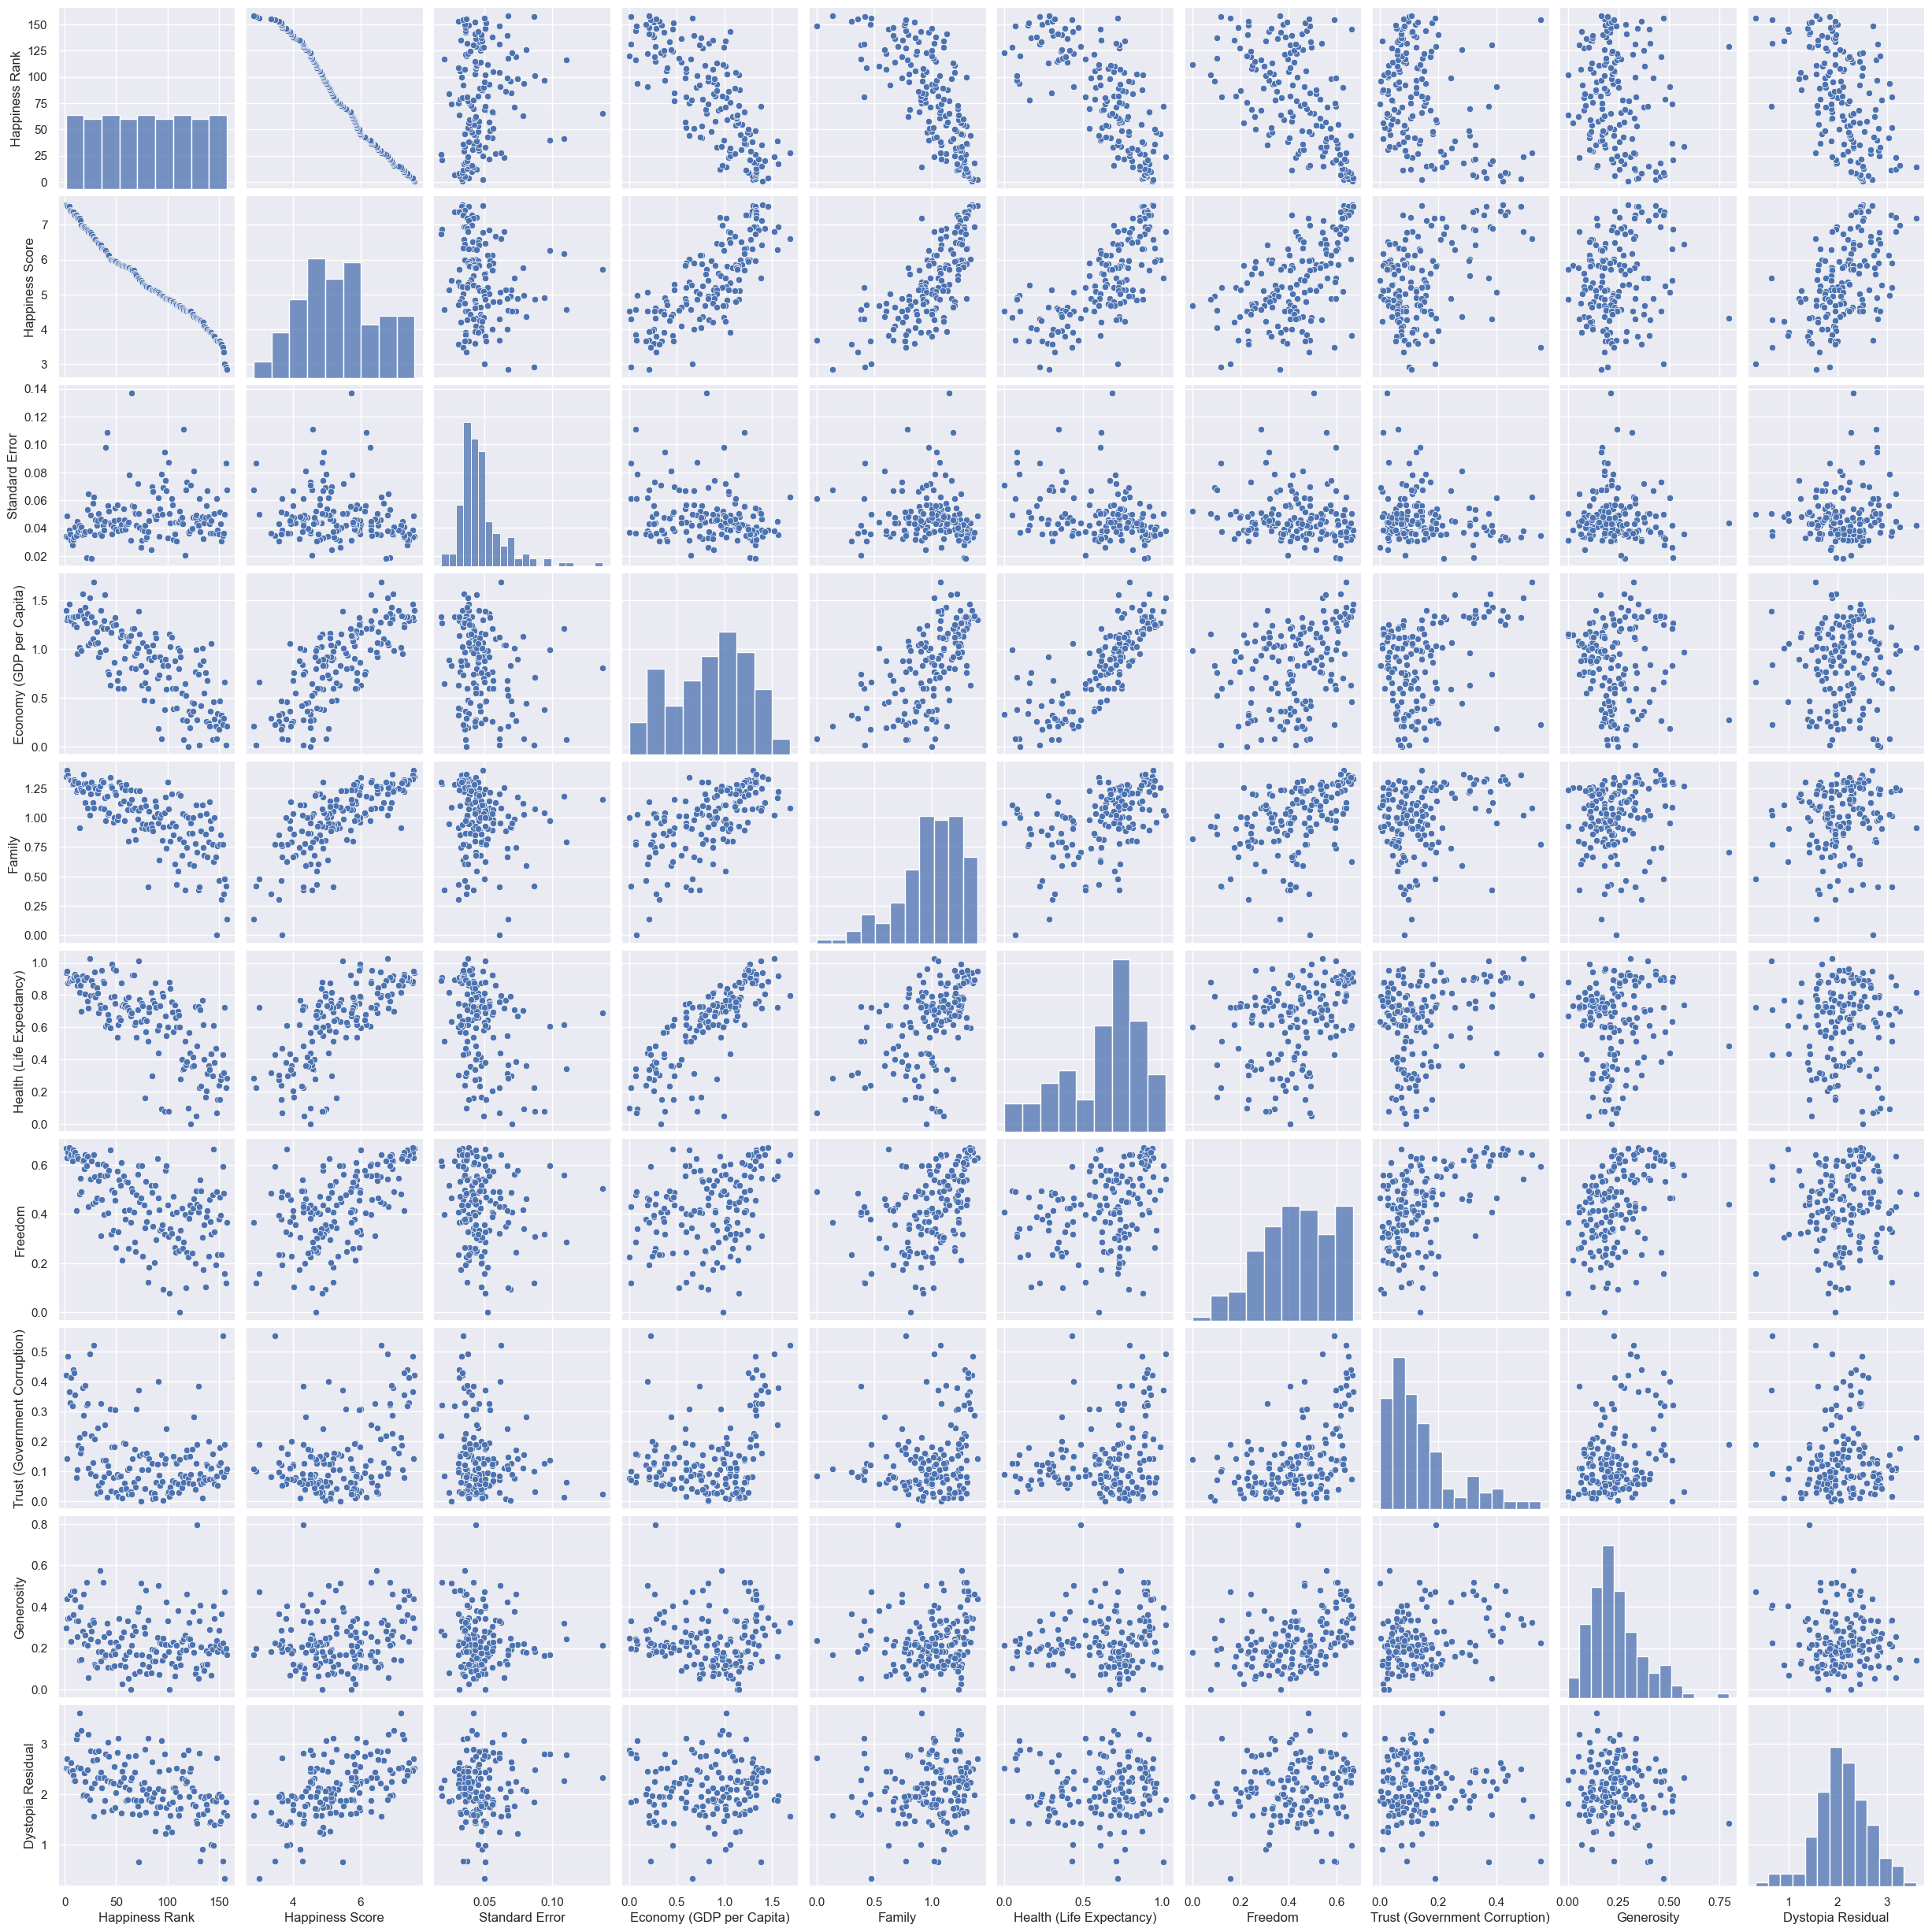

In [112]:
sns.pairplot(df)

In [113]:
df_country = df.groupby('Country').sum()
df_country.sort_values(by='Happiness Score', ascending = False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,
Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


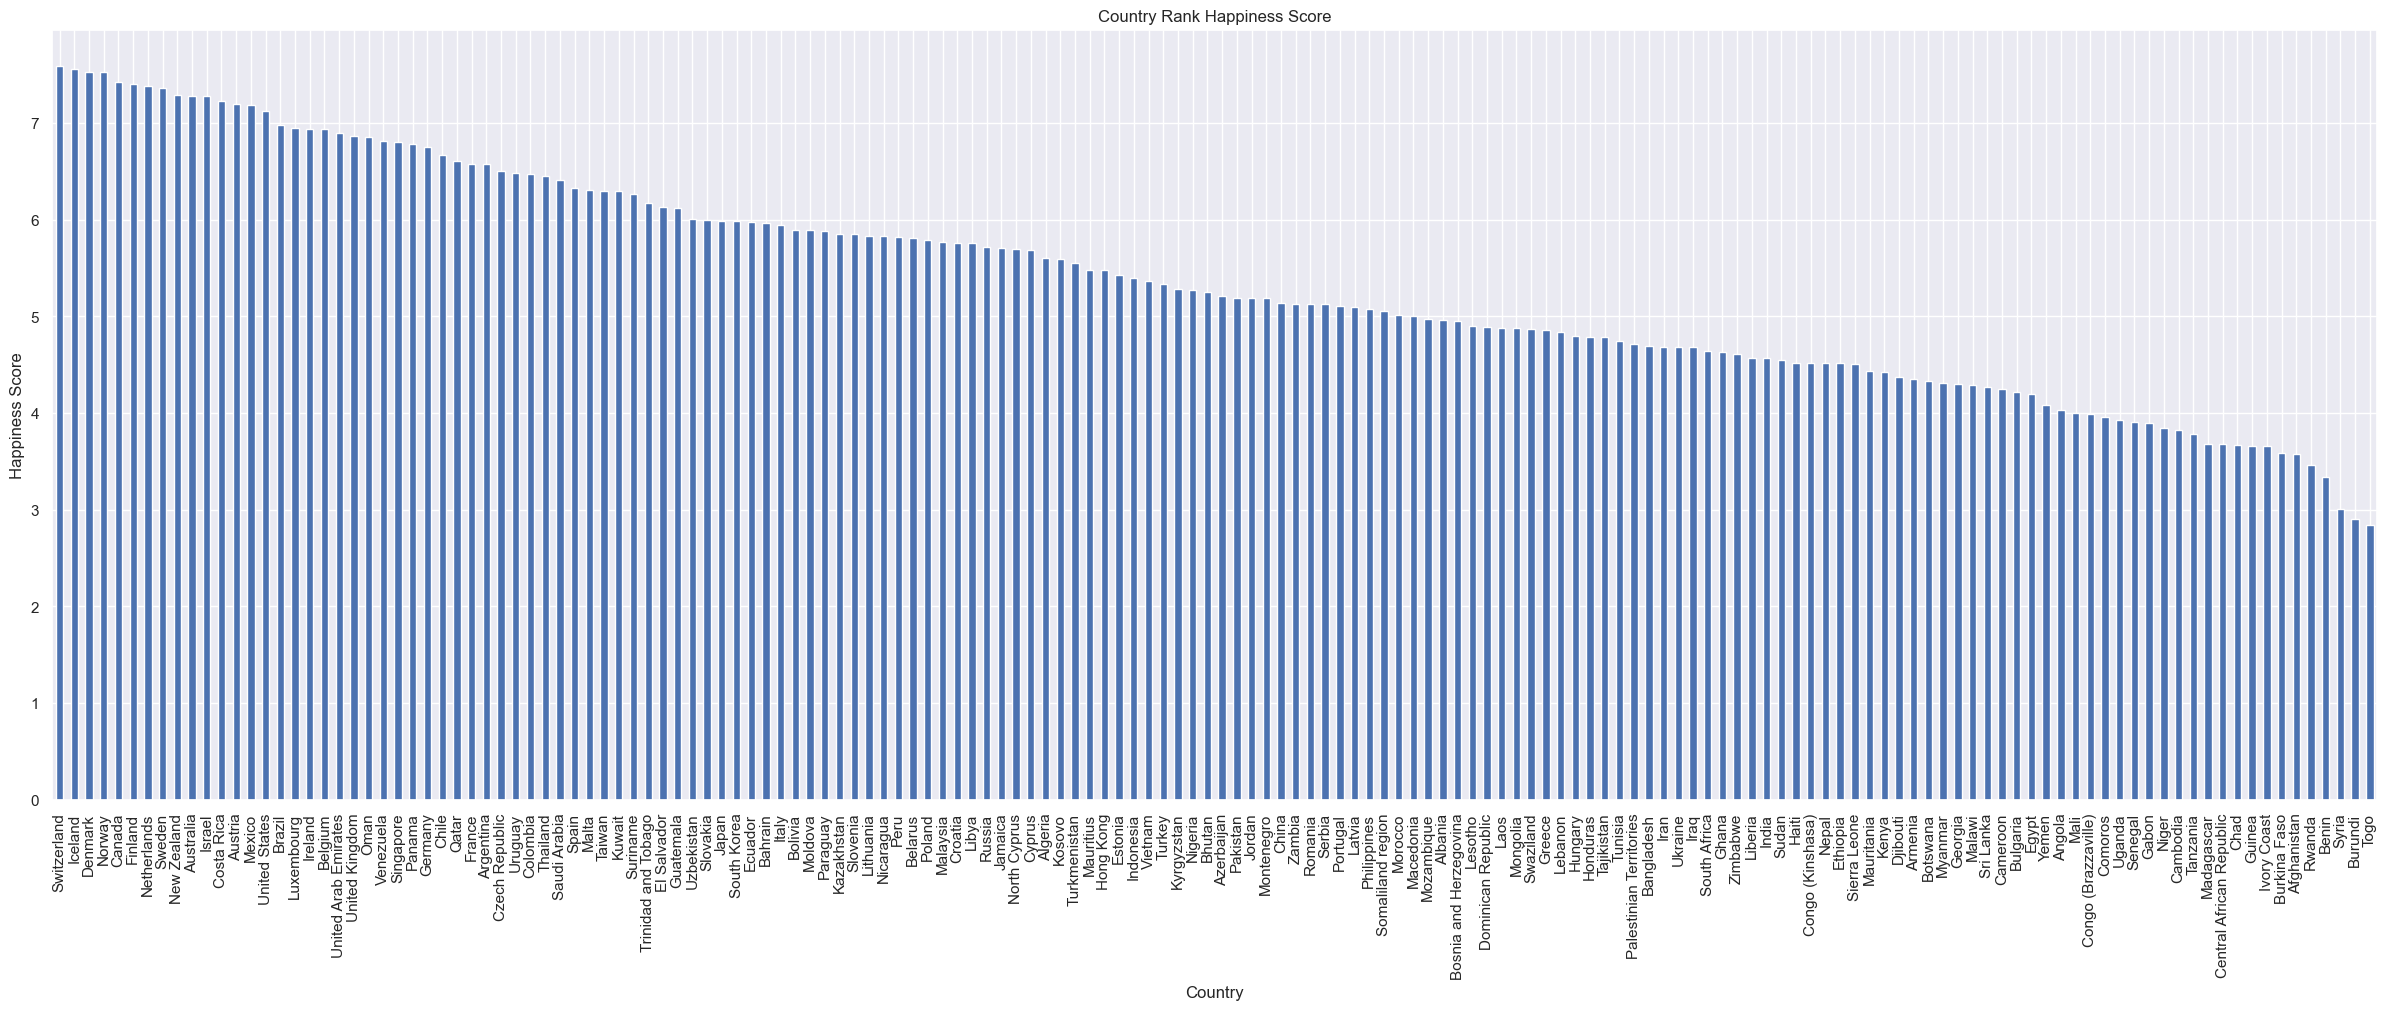

In [114]:
plt.figure(figsize= (30,10))
graph = df_country['Happiness Score'].sort_values(ascending=False)
ax = graph.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Happiness Score')
ax.set_title('Country Rank Happiness Score')
plt.show()

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [116]:
df.Country = le.fit_transform(df.Country)

In [117]:
df.Region = le.fit_transform(df.Region)

Removing the outliers from the dataset

In [118]:
from scipy.stats import zscore
features=df[['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']]
z=np.abs(zscore(features))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [119]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [120]:
df1=df[(z<3).all(axis=1)]

In [121]:
df1.shape

(149, 12)

In [122]:
df1.shape[0]

149

In [123]:
df.shape[0]

158

In [124]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

5.69620253164557

In [125]:
df=df1

In [126]:
df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [127]:
df['Standard Error']=np.log(df['Standard Error'])

In [128]:
df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Seperating Features and Target

In [129]:
X = df.drop(['Happiness Score'], axis=1)
Y = df['Happiness Score']

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-1.713905,-0.915655,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,-0.417415,1.296837,-1.691535,0.336541,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.877145,1.296837,-1.669166,-1.001589,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,0.611504,1.296837,-1.646796,-0.466245,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-1.161739,-0.026647,-1.624427,-0.773374,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,1.641542,0.515437,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-1.249307,0.965966,1.663911,-0.088290,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.687145,0.635095,1.686281,-1.267210,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-1.402550,0.965966,1.731020,-0.673685,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


Modelling

In [131]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [132]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(X_train, Y_train)
    pred = LR.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Max r2 score is: ",MaxAccu, "at random state", MaxRS)

Max r2 score is:  0.9999999514868583 at random state 8


Creating Test Train Split

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=MaxRS)

In [134]:
model = LinearRegression()

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [136]:
LR=LinearRegression()
LR.fit(X_train, Y_train)
predLR=LR.predict(X_test)
pred_Train=LR.predict(X_train)
print("r2 score:",r2_score(Y_test, predLR))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predLR))
print("Mean squared error:",mean_squared_error(Y_test, predLR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predLR)))

r2 score: 0.9999999514868583
r2 score on training data: 99.99999319123562
Mean absolute error: 0.00022661086914624995
Mean squared error: 7.053791514962379e-08
Root Mean squared error: 0.00026558974970737067


In [137]:
RFR=RandomForestRegressor()
RFR.fit(X_train, Y_train)
predRFR=RFR.predict(X_test)
pred_Train=RFR.predict(X_train)
print("r2 score:",r2_score(Y_test, predRFR))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predRFR))
print("Mean squared error:",mean_squared_error(Y_test, predRFR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predRFR)))

r2 score: 0.9899184593975272
r2 score on training data: 99.9501160601475
Mean absolute error: 0.05525111111111109
Mean squared error: 0.014658519928888735
Root Mean squared error: 0.12107237475530384


In [138]:
knn=KNN()
knn.fit(X_train, Y_train)
predknn=knn.predict(X_test)
pred_Train=knn.predict(X_train)
print("r2 score:",r2_score(Y_test, predknn))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predknn))
print("Mean squared error:",mean_squared_error(Y_test, predknn))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predknn)))

r2 score: 0.9291052512343654
r2 score on training data: 93.30963331096933
Mean absolute error: 0.24265777777777775
Mean squared error: 0.10308068266666669
Root Mean squared error: 0.32106180505732335


In [139]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train, Y_train)
predGBR=GBR.predict(X_test)
pred_Train=knn.predict(X_train)
print("r2 score:",r2_score(Y_test, predGBR))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predGBR))
print("Mean squared error:",mean_squared_error(Y_test, predGBR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predGBR)))

r2 score: 0.994559094179936
r2 score on training data: 93.30963331096933
Mean absolute error: 0.04198337878336116
Mean squared error: 0.007911055416971865
Root Mean squared error: 0.08894411400970761


In [140]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train, Y_train)
predDTR=DTR.predict(X_test)
pred_Train=knn.predict(X_train)
print("r2 score:",r2_score(Y_test, predDTR))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predDTR))
print("Mean squared error:",mean_squared_error(Y_test, predDTR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predDTR)))

r2 score: 0.9825009913997951
r2 score on training data: 93.30963331096933
Mean absolute error: 0.09695555555555559
Mean squared error: 0.025443488888888904
Root Mean squared error: 0.15951015293356377


In [141]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
predlasso=lasso.predict(X_test)
pred_Train=lasso.predict(X_train)
print("r2 score:",r2_score(Y_test, predlasso))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predlasso))
print("Mean squared error:",mean_squared_error(Y_test, predlasso))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predlasso)))

r2 score: 0.036227709407875786
r2 score on training data: 3.9419530329191543
Mean absolute error: 1.0022861407614456
Mean squared error: 1.401321076373011
Root Mean squared error: 1.1837740816443867


In [142]:
rd=Ridge()
rd.fit(X_train, Y_train)
predrd=rd.predict(X_test)
pred_Train=lasso.predict(X_train)
print("r2 score:",r2_score(Y_test, predrd))
print("r2 score on training data:",r2_score(Y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(Y_test, predrd))
print("Mean squared error:",mean_squared_error(Y_test, predrd))
print("Root Mean squared error:",np.sqrt(mean_squared_error(Y_test, predrd)))

r2 score: 0.9992215612230348
r2 score on training data: 3.9419530329191543
Mean absolute error: 0.025147947129760793
Mean squared error: 0.0011318468848665025
Root Mean squared error: 0.03364293216808699


Cross Validation Score

In [143]:
score = cross_val_score(LR, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predLR) - score.mean())

[0.99999925 0.99999865 0.99999826 0.99999543 0.9999992 ]
0.9999981554822833
Difference between R2 score and cross validation score is: 1.7960045749498832e-06


In [144]:
score = cross_val_score(RFR, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predRFR) - score.mean())

[-4.41955681 -0.68909601 -0.2750282  -0.78948801 -2.59059465]
-1.752752737224386
Difference between R2 score and cross validation score is: 2.742671196621913


In [145]:
score = cross_val_score(knn, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predknn) - score.mean())

[-9.08966249 -1.73484495 -1.56016952 -6.46855895 -4.57667194]
-4.685981569906834
Difference between R2 score and cross validation score is: 5.615086821141199


In [146]:
score = cross_val_score(GBR, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predGBR) - score.mean())

[-3.51427087  0.2134653  -0.02675085 -0.30512837 -2.32173893]
-1.1908847433483305
Difference between R2 score and cross validation score is: 2.1854438375282665


In [147]:
score = cross_val_score(DTR, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predDTR) - score.mean())

[-3.61683479 -0.52690412 -0.13126977 -0.69461125 -2.08271262]
-1.4104665083429855
Difference between R2 score and cross validation score is: 2.3929674997427806


In [148]:
score = cross_val_score(lasso, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predlasso) - score.mean())

[-42.37117014  -6.16135166   0.08421235 -20.96933149 -29.0315447 ]
-19.689837128820017
Difference between R2 score and cross validation score is: 19.72606483822789


In [149]:
score = cross_val_score(rd, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(Y_test,predrd) - score.mean())

[0.93205095 0.98496242 0.99190844 0.98417717 0.99170417]
0.9769606321734287
Difference between R2 score and cross validation score is: 0.022260929049606193


In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
parameters= {'alpha':[0.1,1,10,100,1000], 'max_iter':[50,1000,10000],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

In [152]:
GCV=GridSearchCV(Ridge(), parameters, cv=5)

In [153]:
GCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000],
                         'max_iter': [50, 1000, 10000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [154]:
GCV.best_params_

{'alpha': 0.1, 'max_iter': 50, 'solver': 'sparse_cg'}

In [155]:
Final_model = Ridge(alpha=0.1,max_iter=50,solver='sparse_cg')

In [156]:
Final_model.fit(X_train, Y_train)
pred=Final_model.predict(X_test)
acc=r2_score(Y_test, pred)
print(acc*100)

99.99620720827859


Saving the model

In [157]:
import joblib
joblib.dump(Final_model, "Happiness_pred")

['Happiness_pred']

Predicting the saved model

In [158]:
model=joblib.load("Happiness_pred")

In [159]:
prediction=model.predict(X_test)
prediction

array([7.42097911, 6.50334554, 6.57786658, 5.58918786, 4.88480441,
       6.33291134, 6.80115723, 3.65660929, 4.03263749, 5.21973418,
       4.24386002, 6.48714733, 3.78125079, 5.88403729, 4.50696979,
       3.92958014, 3.59120929, 4.28441331, 5.43279753, 4.83628964,
       5.84968174, 7.54748965, 2.9339646 , 5.01413854, 4.87440939,
       7.57801945, 3.65961982, 7.51209951, 6.94237666, 4.54716921,
       5.99009139, 7.19235784, 6.80258736, 4.34218864, 5.40628329,
       5.26418364, 4.68373657, 5.06691944, 6.41602742, 4.86377158,
       4.4974669 , 6.01522379, 5.20343865, 5.77306895, 4.60600398])

In [160]:
a=np.array(Y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,7.420979,7.427
1,6.503346,6.505
2,6.577867,6.575
3,5.589188,5.589
4,4.884804,4.885
5,6.332911,6.329
6,6.801157,6.798
7,3.656609,3.655
8,4.032637,4.033
9,5.219734,5.212
